In [10]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
import scipy
import utils_dagma
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score

In [3]:
def get_block(data, n_nodes=20, index=11):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    
    return data_dict[index]

def fdr_log(W, no_knockoff=False):
    if not no_knockoff:
        W11, W21 = \
            get_block(W, n_nodes=W.shape[1] // 2, index=11), \
            get_block(W, n_nodes=W.shape[1] // 2, index=21)
    
        Z = np.abs(W11) - np.abs(W21)
    else:
        Z = np.abs(W)
    fdr = 0.2
    t_list = np.concatenate(([0], np.sort(np.unique(np.abs(Z)))))
    t_last = np.inf
    fdr_est_last = None
    T_T_true = np.abs(W_true)
    mask = (T_T_true > 0.)
    T_T_true[mask], T_T_true[~mask] = 1, 0
    
    for t in reversed(t_list):
        if t < 0.:
            break
        
        fdr_est = (1 + (Z <= -t).sum()) / np.max((1, (Z >= t).sum()))
        
        T_T = Z.copy()
        mask = (T_T >= t)
        T_T[mask], T_T[~mask] = 1, 0
        perf = utils_dagma.count_accuracy_simplify(T_T_true, T_T)
        fdr_true, power = perf['fdr'], perf['tpr']

        if no_knockoff:
            print(f"thresh {t:.4f} | true fdr {fdr_true:.4f} | true power {power:.4f}")
        else:
            print(f"thresh {t:.4f} | est fdr {fdr_est:.4f} | true fdr {fdr_true:.4f} | true power {power:.4f}")
    
        if fdr_est <= fdr:
            t_last = t
            fdr_est_last = fdr_est

In [4]:
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX_sym1.pkl', 'rb') as f:
    W_est_genie3 = pickle.load(f)
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1.pkl', 'rb') as f:
    W_est_dagma = pickle.load(f)
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)

In [5]:
W_est = W_est_genie3
prec, rec, threshold = precision_recall_curve(B_true.flatten(), np.abs(W_est).flatten())
auprc = auc(rec, prec)
auroc = roc_auc_score(B_true.flatten(), np.abs(W_est).flatten())
print(auprc)
print(auroc)

0.21687810214498837
0.6973867021276596


<Axes: >

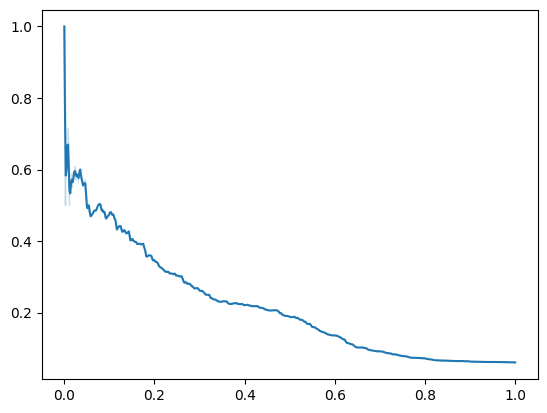

In [50]:
sns.lineplot(x=rec, y=prec)

In [18]:
W_est = W_est_dagma
prec, rec, threshold = precision_recall_curve(B_true.flatten(), np.abs(W_est).flatten())
auprc = auc(rec, prec)
auroc = roc_auc_score(B_true.flatten(), np.abs(W_est).flatten())
print(auprc)
print(auroc)

0.9204911338837186
0.9650916666666667


In [22]:
W_full_genie3.shape

(200, 200)

In [7]:
np.diag(W_full_genie3[:100, :100])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.diag(W_full_genie3[100:, :100])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Text(0, 0.5, 'Z = |W11| - |W21|')

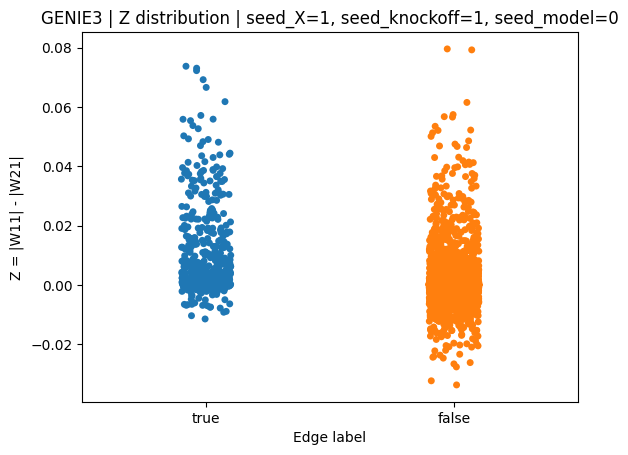

In [32]:
Z_genie3 = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
data = {
    'true': Z_genie3[B_true].flatten(),
    'false': Z_genie3[~B_true].flatten(),
}

ax = sns.stripplot(data)
ax.set_title("GENIE3 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

Text(0, 0.5, 'Z = |W11| - |W21|')

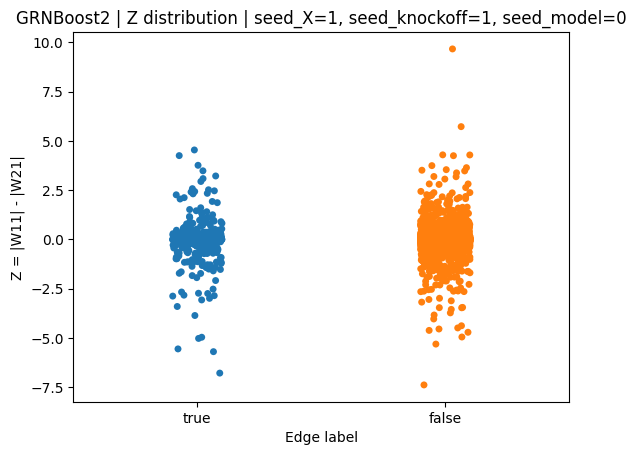

In [41]:
Z_grnboost2_5_ols = np.abs(W_full_grnboost2_5_ols[:100, :100]) - np.abs(W_full_grnboost2_5_ols[100:, :100])
data = {
    'true': Z_grnboost2_5_ols[B_true].flatten(),
    'false': Z_grnboost2_5_ols[~B_true].flatten(),
}
ax = sns.stripplot(data)
ax.set_title("GRNBoost2 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

In [44]:
fdr_log(W_full_grnboost2_5_ols)

thresh 9.6717 | est fdr 1.0000 | true fdr 1.0000 | true power 0.0000
thresh 7.3826 | est fdr 2.0000 | true fdr 1.0000 | true power 0.0000
thresh 6.7822 | est fdr 3.0000 | true fdr 1.0000 | true power 0.0000
thresh 5.7271 | est fdr 1.5000 | true fdr 1.0000 | true power 0.0000
thresh 5.6946 | est fdr 2.0000 | true fdr 1.0000 | true power 0.0000
thresh 5.5547 | est fdr 2.5000 | true fdr 1.0000 | true power 0.0000
thresh 5.3095 | est fdr 3.0000 | true fdr 1.0000 | true power 0.0000
thresh 5.0222 | est fdr 3.5000 | true fdr 1.0000 | true power 0.0000
thresh 4.9621 | est fdr 4.0000 | true fdr 1.0000 | true power 0.0000
thresh 4.9502 | est fdr 4.5000 | true fdr 1.0000 | true power 0.0000
thresh 4.7102 | est fdr 5.0000 | true fdr 1.0000 | true power 0.0000
thresh 4.6151 | est fdr 5.5000 | true fdr 1.0000 | true power 0.0000
thresh 4.5440 | est fdr 6.0000 | true fdr 1.0000 | true power 0.0000
thresh 4.5434 | est fdr 4.0000 | true fdr 0.6667 | true power 0.0017
thresh 4.4895 | est fdr 4.3333 | t

Text(0.5, 0.98, 'GRNBoost2 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0 | OLS')

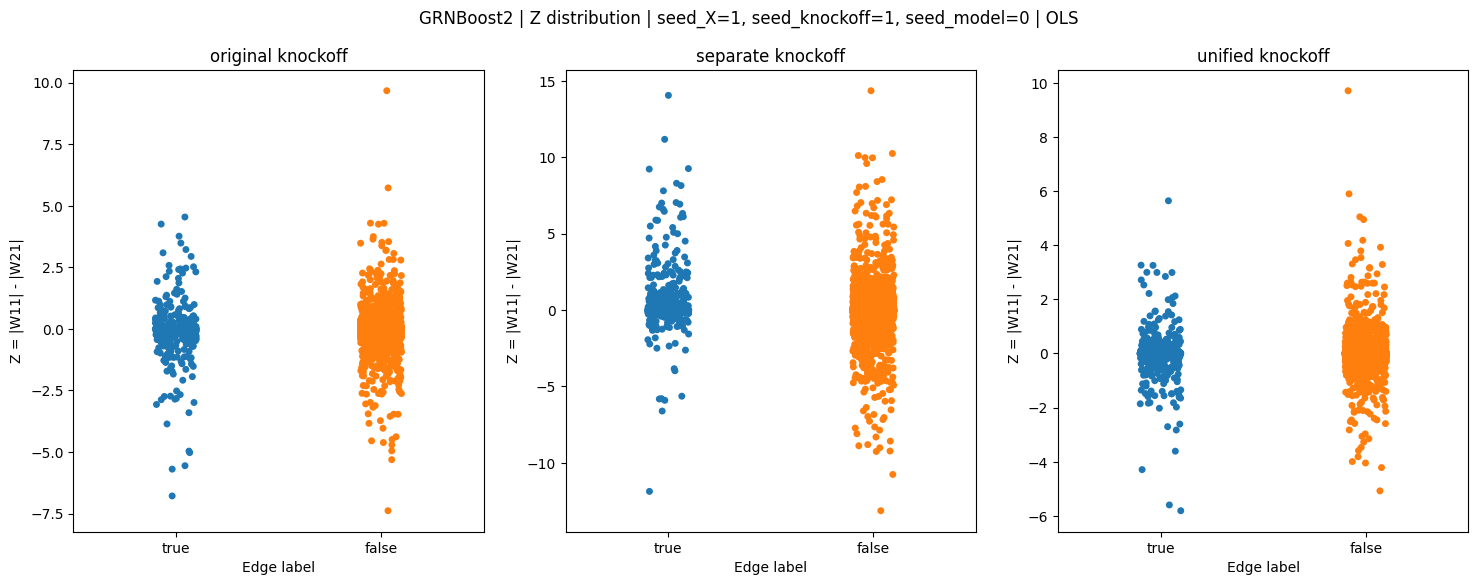

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

ax = axs[0]
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_5_OLS_grnboost2/'
with open(path + 'W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
W_full_genie3[:100, :100] = W_full_genie3[:100, :100] - np.diag(np.diag(W_full_genie3[:100, :100]))
W_full_genie3[100:, :100] = W_full_genie3[100:, :100] - np.diag(np.diag(W_full_genie3[100:, :100]))
Z = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)
data = {
    'true': Z[B_true].flatten(),
    'false': Z[~B_true].flatten(),
}
ax = sns.stripplot(data, ax=ax)
ax.set_title("original knockoff")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

""""""

ax = axs[1]
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_5_OLS_new_grnboost2/'
with open(path + 'W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
W_full_genie3[:100, :100] = W_full_genie3[:100, :100] - np.diag(np.diag(W_full_genie3[:100, :100]))
W_full_genie3[100:, :100] = W_full_genie3[100:, :100] - np.diag(np.diag(W_full_genie3[100:, :100]))
Z = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)
data = {
    'true': Z[B_true].flatten(),
    'false': Z[~B_true].flatten(),
}
ax = sns.stripplot(data, ax=ax)
ax.set_title("separate knockoff")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

""""""

ax = axs[2]
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_5_OLS_disable_remove_self_grnboost2/'
with open(path + 'W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
W_full_genie3[:100, :100] = W_full_genie3[:100, :100] - np.diag(np.diag(W_full_genie3[:100, :100]))
W_full_genie3[100:, :100] = W_full_genie3[100:, :100] - np.diag(np.diag(W_full_genie3[100:, :100]))
Z = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)
data = {
    'true': Z[B_true].flatten(),
    'false': Z[~B_true].flatten(),
}
ax = sns.stripplot(data, ax=ax)
ax.set_title("unified knockoff")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

fig.suptitle("GRNBoost2 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0 | OLS")

In [47]:
Z[Z > 8]

array([9.70489336])

Text(0, 0.5, 'Z = |W11| - |W21|')

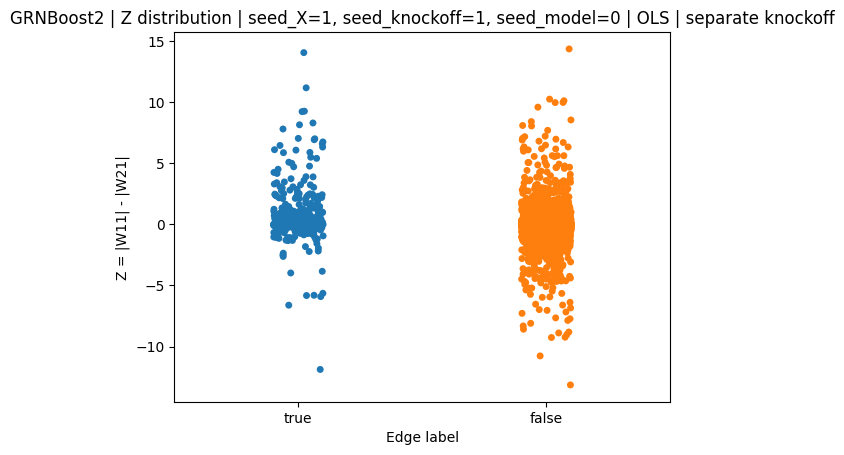

In [39]:
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_5_OLS_new_grnboost2/'

with open(path + 'W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
W_full_genie3[:100, :100] = W_full_genie3[:100, :100] - np.diag(np.diag(W_full_genie3[:100, :100]))
W_full_genie3[100:, :100] = W_full_genie3[100:, :100] - np.diag(np.diag(W_full_genie3[100:, :100]))
Z = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)
data = {
    'true': Z[B_true].flatten(),
    'false': Z[~B_true].flatten(),
}
ax = sns.stripplot(data)
ax.set_title("GRNBoost2 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0 | OLS | separate knockoff")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

Text(0, 0.5, 'Z = |W11| - |W21|')

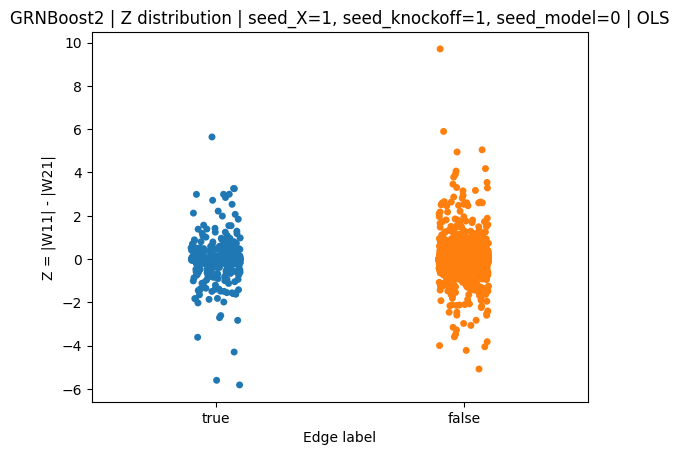

In [37]:
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_5_OLS_disable_remove_self_grnboost2/'

with open(path + 'W/W_1_1_0.pkl', 'rb') as f:
    W_full_genie3 = pickle.load(f)
W_full_genie3 = W_full_genie3['W_est']
W_full_genie3[:100, :100] = W_full_genie3[:100, :100] - np.diag(np.diag(W_full_genie3[:100, :100]))
W_full_genie3[100:, :100] = W_full_genie3[100:, :100] - np.diag(np.diag(W_full_genie3[100:, :100]))
Z = np.abs(W_full_genie3[:100, :100]) - np.abs(W_full_genie3[100:, :100])
with open('/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v49/v100_600_normX_sym1_option_10_PLS_topo_sort/X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)
data = {
    'true': Z[B_true].flatten(),
    'false': Z[~B_true].flatten(),
}
ax = sns.stripplot(data)
ax.set_title("GRNBoost2 | Z distribution | seed_X=1, seed_knockoff=1, seed_model=0 | OLS | unified knockoff")
ax.set_xlabel("Edge label")
ax.set_ylabel("Z = |W11| - |W21|")

In [36]:
W_full_genie3

array([[0.        , 0.        , 0.02124027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1521449 , 0.        , 0.36584621, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06977706, 0.        , ..., 0.        , 0.        ,
        0.        ]])